In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
import pickle

Read the text file containing the lyrics data.

In [ ]:
# read lyrics dataset
with open('dataset_sample.txt', 'rb') as file:
  data = str(file.read())

print(data)
print(type(data))

b'I know he rescued my soul\r\nHis blood has covered my sin\r\nI believe\r\nI believe\r\nMy shame He\'s taken away\r\nMy pain is healed in his name\r\nI believe\r\nI believe\r\nI\'ll raise a banner\r\n\'Cause my Lord has conquered the grave\r\nMy Redeemer Lives\r\nMy Redeemer Lives\r\nMy Redeemer Lives\r\nMy Redeemer Lives\r\nI know He\'s rescued my soul\r\nHis blood has covered my sin\r\nI believe\r\nI believe\r\nMy shame He\'s taken away\r\nMy pain is healed in His Name\r\nI believe\r\nI believe\r\nI\'ll raise a banner\r\n\'Cause My Lord has conquered the grave\r\nYou Lift my burdens\r\nI\'ll rise with You\r\nI\'m dancing on this mountain top to see your kingdom come\r\nMy Redeemer Lives\r\nMy Redeemer Lives\r\nMy Redeemer Lives\r\nMy Redeemer Lives\r\n\r\nHear Our Praises"\r\n\r\nmay our homes be filled with dancing\r\nmay our streets be filled with joy.\r\nmay injustice bow to Jesus\r\nas the people turn to pray.\r\n\r\nfrom the mountains to the valleys\r\nhear our praises rise to 

In [ ]:
# create tokenizer object
tokenizer = Tokenizer()
# store each sentence in a list
corpus = data.lower().replace("\\r", "").split('\\n') 
# create a dictionary object for each word
tokenizer.fit_on_texts(corpus)
# get the total length of words, including oov word
total_words = len(tokenizer.word_index) + 1  

print('The total words in the vocabulary is'.format(total_words))
print(corpus)

The total words in the vocabulary is
["b'i know he rescued my soul", 'his blood has covered my sin', 'i believe', 'i believe', "my shame he\\'s taken away", 'my pain is healed in his name', 'i believe', 'i believe', "i\\'ll raise a banner", "\\'cause my lord has conquered the grave", 'my redeemer lives', 'my redeemer lives', 'my redeemer lives', 'my redeemer lives', "i know he\\'s rescued my soul", 'his blood has covered my sin', 'i believe', 'i believe', "my shame he\\'s taken away", 'my pain is healed in his name', 'i believe', 'i believe', "i\\'ll raise a banner", "\\'cause my lord has conquered the grave", 'you lift my burdens', "i\\'ll rise with you", "i\\'m dancing on this mountain top to see your kingdom come", 'my redeemer lives', 'my redeemer lives', 'my redeemer lives', 'my redeemer lives', '', 'hear our praises"', '', 'may our homes be filled with dancing', 'may our streets be filled with joy.', 'may injustice bow to jesus', 'as the people turn to pray.', '', 'from the mount

### Preprocess the training data
For example, a line like "Thank you God, I am grateful" would be converted to "82 169 44 39 12 50".
Then the n_gram_sequence would be 

["82 169", 

"82 169 44", 

"82 169 44 39", 

"82 169 44 39 12", 

"82 169 44 39 12 50"]. 

This will be done for each line in the corpus.

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    # create n_gram_sequence for each sentence in the corpus
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# sanity check
print(input_sequences)

[[195, 26], [195, 26, 42], [195, 26, 42, 119], [195, 26, 42, 119, 4], [195, 26, 42, 119, 4, 47], [78, 120], [78, 120, 60], [78, 120, 60, 121], [78, 120, 60, 121, 4], [78, 120, 60, 121, 4, 122], [1, 34], [1, 34], [4, 123], [4, 123, 42], [4, 123, 42, 10], [4, 123, 42, 10, 124], [4, 123, 42, 10, 124, 125], [4, 126], [4, 126, 11], [4, 126, 11, 127], [4, 126, 11, 127, 9], [4, 126, 11, 127, 9, 78], [4, 126, 11, 127, 9, 78, 92], [1, 34], [1, 34], [1, 15], [1, 15, 93], [1, 15, 93, 35], [1, 15, 93, 35, 128], [129, 4], [129, 4, 19], [129, 4, 19, 60], [129, 4, 19, 60, 130], [129, 4, 19, 60, 130, 3], [129, 4, 19, 60, 130, 3, 131], [4, 43], [4, 43, 36], [4, 43], [4, 43, 36], [4, 43], [4, 43, 36], [4, 43], [4, 43, 36], [1, 26], [1, 26, 42], [1, 26, 42, 10], [1, 26, 42, 10, 119], [1, 26, 42, 10, 119, 4], [1, 26, 42, 10, 119, 4, 47], [78, 120], [78, 120, 60], [78, 120, 60, 121], [78, 120, 60, 121, 4], [78, 120, 60, 121, 4, 122], [1, 34], [1, 34], [4, 123], [4, 123, 42], [4, 123, 42, 10], [4, 123, 42, 

In [ ]:
# get the maximum sequence lenght for padding
max_sequence_len = max([len(x) for x in input_sequences])
print(f"The maximum sequence length is {max_sequence_len}")

The maximum sequence length is 12


In [ ]:
# pad our input sequences to be of the same length based on the maximum sequence length
input_sequences = np.array(pad_sequences(input_sequences, 
                                         maxlen=max_sequence_len, 
                                         padding='pre'))

In [ ]:
# create x's and y's for training
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
# one-hot encode the labels based on the total number of word
# mostly for the neural network output layer
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
# check the xs and ys
print(xs)
print(ys)

[[  0   0   0 ...   0   0 195]
 [  0   0   0 ...   0 195  26]
 [  0   0   0 ... 195  26  42]
 ...
 [  0   0   0 ...   0   0   3]
 [  0   0   0 ...   0   3 193]
 [  0   0   0 ...   3 193  12]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Model Training
Train neural network to classify what the next word should be.

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(20))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
40/40 [==============================] - 3s 8ms/step - loss: 5.8052 - accuracy: 0.0336
Epoch 2/500
40/40 [==============================] - 0s 8ms/step - loss: 5.4215 - accuracy: 0.0392
Epoch 3/500
40/40 [==============================] - 0s 9ms/step - loss: 5.0528 - accuracy: 0.0520
Epoch 4/500
40/40 [==============================] - 0s 8ms/step - loss: 4.9709 - accuracy: 0.0520
Epoch 5/500
40/40 [==============================] - 0s 8ms/step - loss: 4.9469 - accuracy: 0.0616
Epoch 6/500
40/40 [==============================] - 0s 8ms/step - loss: 4.9288 - accuracy: 0.0592
Epoch 7/500
40/40 [==============================] - 0s 8ms/step - loss: 4.8988 - accuracy: 0.0592
Epoch 8/500
40/40 [==============================] - 0s 8ms/step - loss: 4.8483 - accuracy: 0.0592
Epoch 9/500
40/40 [==============================] - 0s 8ms/step - loss: 4.7988 - accuracy: 0.0592
Epoch 10/500
40/40 [==============================] - 0s 8ms/step - loss: 4.7591 - accuracy: 0.0536
Epoch 11/

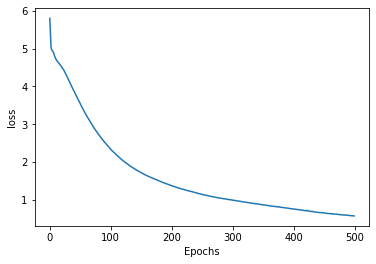

In [ ]:
# Evaluate model performance
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  '''Function to plot model's training performance
  Parameters
  -----------
  history - history object of model training
  metric - str, metric you want to plot
  
  Returns
  --------
  Matplotlib line plot'''

  plt.plot(history.history[metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.show()

# plot loss
plot_graphs(history, "loss")

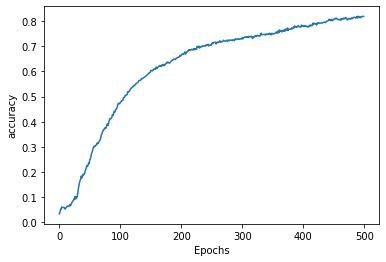

In [ ]:
# plot accuracy
plot_graphs(history, "accuracy")

In [ ]:
# store model file
model.save('hillsong_lyrics_model.h5')
# pickle tokenizer
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [ ]:
# Predict on new word
seed_text = 'You are awesome'
next_words = 20
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], 
                           maxlen=max_sequence_len-1, 
                           padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
  output_word = tokenizer.index_word[predicted]
  seed_text += ' ' + output_word

print(seed_text)

You are awesome honored and lifted up to the valleys low upon deer world sing better 's world single knows knows knows guides
